# Practical Linear Algebra for Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc

rc("animation", html="jshtml")


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io, color

# convolution
from scipy.signal import convolve2d


import pandas as pd


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats(
    "svg"
)  # display figures in vector format
plt.rcParams.update({"font.size": 14})  # set global font size

###### ============================
# Chapter 7
## Matrix Applications

#### Covariance

In terms of vectors, Covariance is the dot product of two mean-centered variables $\tilde{x}$ $\tilde{y}$. It can be normalized by (n-1) in order to avoid lrge covariance value. It is similar to correlaction but it is not bounded by -1 and +1.

$$c_{a,b}=(n-1)^{-1} \sum \limits^{n}_{i=1}(x_i-x_{avg})(yi-y_{avg})=\frac{\tilde{x}^T\tilde{y}}{n-1}$$

In terms Matrices ($X$), if we multipli $X^TX$, then each element will be pairo-wise covariance of each row and colomn.

$$C=\frac{X^TX}{n-1}$$

where $C_{i,j}$ is the covariance between features $i$ and $j$ in $X$.

- Covariance and correlarion matrices are symmetric ($X^TX$).
- The diagonal values are variance of each feature with itself. It's the squared STD and quantifies the dispresion around the mean.

## <u>Functions np.cov() and np.corrcoef() calculated covariance and correlation of matrices.</u>

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
data = pd.read_csv(url, sep=",", header=None)

data.columns = [
    "state",
    "county",
    "community",
    "communityname",
    "fold",
    "population",
    "householdsize",
    "racepctblack",
    "racePctWhite",
    "racePctAsian",
    "racePctHisp",
    "agePct12t21",
    "agePct12t29",
    "agePct16t24",
    "agePct65up",
    "numbUrban",
    "pctUrban",
    "medIncome",
    "pctWWage",
    "pctWFarmSelf",
    "pctWInvInc",
    "pctWSocSec",
    "pctWPubAsst",
    "pctWRetire",
    "medFamInc",
    "perCapInc",
    "whitePerCap",
    "blackPerCap",
    "indianPerCap",
    "AsianPerCap",
    "OtherPerCap",
    "HispPerCap",
    "NumUnderPov",
    "PctPopUnderPov",
    "PctLess9thGrade",
    "PctNotHSGrad",
    "PctBSorMore",
    "PctUnemployed",
    "PctEmploy",
    "PctEmplManu",
    "PctEmplProfServ",
    "PctOccupManu",
    "PctOccupMgmtProf",
    "MalePctDivorce",
    "MalePctNevMarr",
    "FemalePctDiv",
    "TotalPctDiv",
    "PersPerFam",
    "PctFam2Par",
    "PctKids2Par",
    "PctYoungKids2Par",
    "PctTeen2Par",
    "PctWorkMomYoungKids",
    "PctWorkMom",
    "NumIlleg",
    "PctIlleg",
    "NumImmig",
    "PctImmigRecent",
    "PctImmigRec5",
    "PctImmigRec8",
    "PctImmigRec10",
    "PctRecentImmig",
    "PctRecImmig5",
    "PctRecImmig8",
    "PctRecImmig10",
    "PctSpeakEnglOnly",
    "PctNotSpeakEnglWell",
    "PctLargHouseFam",
    "PctLargHouseOccup",
    "PersPerOccupHous",
    "PersPerOwnOccHous",
    "PersPerRentOccHous",
    "PctPersOwnOccup",
    "PctPersDenseHous",
    "PctHousLess3BR",
    "MedNumBR",
    "HousVacant",
    "PctHousOccup",
    "PctHousOwnOcc",
    "PctVacantBoarded",
    "PctVacMore6Mos",
    "MedYrHousBuilt",
    "PctHousNoPhone",
    "PctWOFullPlumb",
    "OwnOccLowQuart",
    "OwnOccMedVal",
    "OwnOccHiQuart",
    "RentLowQ",
    "RentMedian",
    "RentHighQ",
    "MedRent",
    "MedRentPctHousInc",
    "MedOwnCostPctInc",
    "MedOwnCostPctIncNoMtg",
    "NumInShelters",
    "NumStreet",
    "PctForeignBorn",
    "PctBornSameState",
    "PctSameHouse85",
    "PctSameCity85",
    "PctSameState85",
    "LemasSwornFT",
    "LemasSwFTPerPop",
    "LemasSwFTFieldOps",
    "LemasSwFTFieldPerPop",
    "LemasTotalReq",
    "LemasTotReqPerPop",
    "PolicReqPerOffic",
    "PolicPerPop",
    "RacialMatchCommPol",
    "PctPolicWhite",
    "PctPolicBlack",
    "PctPolicHisp",
    "PctPolicAsian",
    "PctPolicMinor",
    "OfficAssgnDrugUnits",
    "NumKindsDrugsSeiz",
    "PolicAveOTWorked",
    "LandArea",
    "PopDens",
    "PctUsePubTrans",
    "PolicCars",
    "PolicOperBudg",
    "LemasPctPolicOnPatr",
    "LemasGangUnitDeploy",
    "LemasPctOfficDrugUn",
    "PolicBudgPerPop",
    "ViolentCrimesPerPop",
]

# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(["state", "fold"], axis=1).values

data

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


DataMat is in (1994, 100) form.
2.4498401746994428e-18


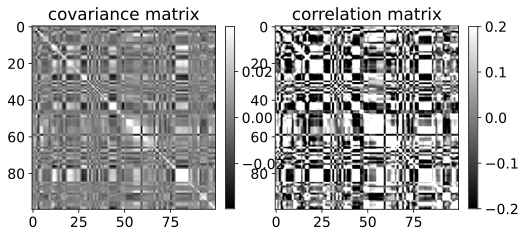

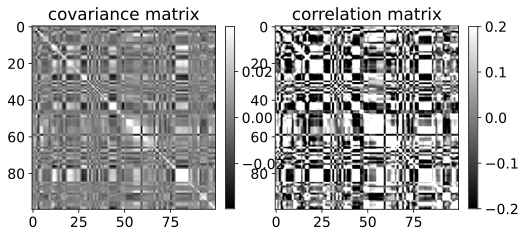

In [3]:
print(f"DataMat is in {dataMat.shape} form.")

datamean = np.mean(dataMat, axis=0)

# mean-center the data using broadcasting
dataMatM = dataMat - datamean

# confirm that any given feature has mean=0 (or very close...)
print(np.mean(dataMatM[:, 0]))


# Now to compute the covariance matrix using formyla
# covMat = dataMatM.T @ dataMatM  # data matrix times its transpose
# covMat /= (dataMatM.shape[0]-1) # divide by N-1

# Now to compute the covariance and correlation matrix using NumPY
covMat = np.cov(dataMatM.T)
corMat = np.corrcoef(dataMatM.T)


# and show it
clim = np.max(np.abs(covMat)) * 0.2
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
h1 = axs[0].imshow(covMat, vmin=-clim, vmax=clim, cmap="gray")
axs[0].set_title("covariance matrix")

clim = np.max(np.abs(corMat)) * 0.2
h2 = axs[1].imshow(corMat, vmin=-clim, vmax=clim, cmap="gray")
axs[1].set_title("correlation matrix")

fig.colorbar(h1, ax=axs[0], fraction=0.045)
fig.colorbar(h2, ax=axs[1], fraction=0.045)

plt.show()


# Exer 1

covMat = np.cov(dataMatM.T)
covDiag = 1 / np.sqrt(np.diag(covMat))


S = np.diag(covDiag)


corMat = S @ covMat @ S

clim = np.max(np.abs(covMat)) * 0.2
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
h1 = axs[0].imshow(covMat, vmin=-clim, vmax=clim, cmap="gray")
axs[0].set_title("covariance matrix")

clim = np.max(np.abs(corMat)) * 0.2
h2 = axs[1].imshow(corMat, vmin=-clim, vmax=clim, cmap="gray")
axs[1].set_title("correlation matrix")

fig.colorbar(h1, ax=axs[0], fraction=0.045)
fig.colorbar(h2, ax=axs[1], fraction=0.045)

plt.show()

###### ============================
#### Geometric Transformations


<u>Pure rotation matrix</u> is in the form:

$$T=\begin{bmatrix} \cos(\theta) & \sin(\theta) \\ -\sin(\theta) & \cos(\theta) \end{bmatrix}$$ 

[-1.         -0.89473684 -0.78947368 -0.68421053 -0.57894737 -0.47368421
 -0.36842105 -0.26315789 -0.15789474 -0.05263158  0.05263158  0.15789474
  0.26315789  0.36842105  0.47368421  0.57894737  0.68421053  0.78947368
  0.89473684  1.        ]


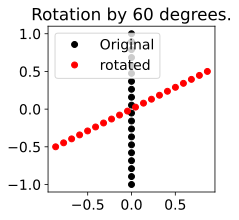

In [4]:
data_y = np.linspace(-1, 1, 20)
print(data_y)
data = np.vstack((np.zeros(data_y.shape), data_y))

fig, axs = plt.subplots(figsize=(3, 3))
axs.plot(data[0, :], data[1, :], "ko", label="Original")

th = np.pi / 3

# transformation matrix
T = np.array([[np.cos(th), np.sin(th)], [-np.sin(th), np.cos(th)]])

data_r = T @ data
plt.title(f"Rotation by {np.rad2deg(th):.0f} degrees.")


axs.plot(data_r[0, :], data_r[1, :], "ro", label="rotated")

plt.legend()

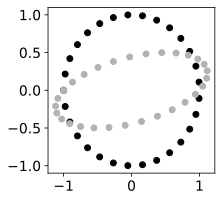

In [5]:
# Exer 3
T = np.array([[1, 0.5], [0, 0.5]])

theta = np.linspace(-np.pi, np.pi, 30)

data_orignal = np.vstack((np.cos(theta), np.sin(theta)))

fig, axs = plt.subplots(figsize=(3, 3))
axs.plot(data_orignal[0, :], data_orignal[1, :], "ko")

data_rotated = T @ data_orignal
axs.plot(data_rotated[0, :], data_rotated[1, :], "o", color=[0.7, 0.7, 0.7])

In [6]:
# function to update the axis on each iteration
def aframe(ph):

    # create the transformation matrix
    T = np.array([[-1, 1 - ph], [0, -1]])

    # apply the transformation to the points using matrix multiplication
    P = T @ points

    # update the dots
    plth.set_xdata(P[0, :])
    plth.set_ydata(P[1, :])

    # export the plot handles
    return plth


# define XY points
theta = np.linspace(0, 2 * np.pi, 100)
points = np.vstack((np.sin(theta), np.cos(theta)))


# setup figure
fig, ax = plt.subplots(1, figsize=(3, 3))
(plth,) = ax.plot(np.cos(theta), np.sin(theta), "ko")
ax.set_aspect("equal")
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.close()

# define values for transformation (note: clip off the final point for a smooth animation loop)
phi = np.linspace(-1, 1 - 1 / 40, 40) ** 2

# run animation!
animation.FuncAnimation(fig, aframe, phi, interval=100, repeat=True)

In [7]:
# function to draw the plots
def aframe(ph):

    # create the transformation matrix
    T = np.array([[1 - ph / 3, 0], [0, ph]])

    # apply the transformation to the points using matrix multiplication
    P1 = T @ Y1
    P2 = T @ Y2

    # update the lower/upper lines
    plth1.set_xdata(P1[0, :])
    plth1.set_ydata(P1[1, :])

    plth2.set_xdata(P2[0, :])
    plth2.set_ydata(P2[1, :])

    # export the plot handles
    return (plth1, plth2)


# define XY points
th = np.linspace(0, 2 * np.pi, 100)  # th = theta (angles)
Y1 = np.vstack((th, np.cos(th)))
Y2 = np.vstack((th, np.sin(th)))


# setup figure
fig, ax = plt.subplots(1, figsize=(3, 3))

(plth1,) = ax.plot(Y1[0, :], Y1[1, :], "ko")
(plth2,) = ax.plot(Y2[0, :], Y2[1, :], "s", color=[0.7, 0.7, 0.7])
ax.set_ylim([-2, 2])
plt.close()

# define phases and run animation
phi = 1 - np.linspace(-1, 1 - 1 / 40, 40) ** 2
animation.FuncAnimation(fig, aframe, phi, interval=50, repeat=True)

###### ============================
#### Image Feature Detection

Convolution between two matrix is moving the kernel on the larger matrix and apply Hadamard Multiplication and summation.

The scipy function convolve2d(image,kernel,mode='same') will do this in frequency domain

Image shape: (20, 20)
Kernel shape: (7, 7)
ConvOut shape: (26, 26)
Image Pad shape: (26, 26)


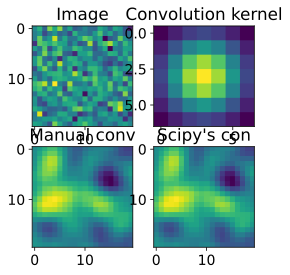

In [8]:
# image
imgN = 20
image = np.random.randn(imgN, imgN)

print(f"Image shape: {image.shape}")
# convolution kernel
kernelN = 7
Y, X = np.meshgrid(np.linspace(-3, 3, kernelN), np.linspace(-3, 3, kernelN))
kernel = np.exp(-(X**2 + Y**2) / 7)
kernel = kernel / np.sum(kernel)  # normalize

print(f"Kernel shape: {kernel.shape}")

# now for the convolution
halfKr = kernelN // 2
convoutput = np.zeros((imgN + kernelN - 1, imgN + kernelN - 1))

print(f"ConvOut shape: {convoutput.shape}")

imagePad = np.zeros(convoutput.shape)
imagePad[halfKr:-halfKr:1, halfKr:-halfKr:1] = image

print(f"Image Pad shape: {imagePad.shape}")

# double for-loop over rows and columns (width and height of picture)
for rowi in range(halfKr, imgN + halfKr):
    for coli in range(halfKr, imgN + halfKr):

        # cut out a piece of the image
        pieceOfImg = imagePad[
            rowi - halfKr : rowi + halfKr + 1 : 1, coli - halfKr : coli + halfKr + 1 : 1
        ]

        # dot product: element-wise multiply and sum
        dotprod = np.sum(pieceOfImg * kernel)

        # store the result for this pixel
        convoutput[rowi, coli] = dotprod

# trim off edges
convoutput = convoutput[halfKr:-halfKr:1, halfKr:-halfKr:1]

# using scipy
convoutput2 = convolve2d(image, kernel, mode="same")


fig, ax = plt.subplots(2, 2, figsize=(4, 4))

ax[0, 0].imshow(image)
ax[0, 0].set_title("Image")

ax[0, 1].imshow(kernel)
ax[0, 1].set_title("Convolution kernel")

ax[1, 0].imshow(convoutput)
ax[1, 0].set_title("Manual conv")

ax[1, 1].imshow(convoutput2)
ax[1, 1].set_title("Scipy's con")

# for i in ax.flatten(): i.axis('off')

plt.show()

image shape is (1675, 3000, 3)
(1675, 3000)
(1675, 3000, 3)


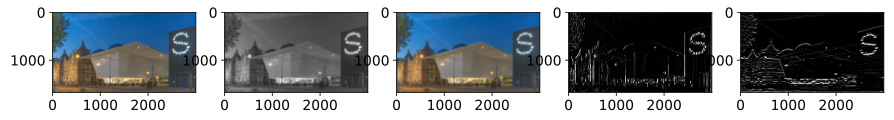

In [9]:
bathtub = io.imread(
    "https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg"
)
# bathtub = io.imread('https://upload.wikimedia.org/wikipedia/commons/1/10/Botryoidal_Purple_Grape_Agate_Chalcedony_from_Indonesia.jpg')

# check the size
print(f"image shape is {bathtub.shape}")

# let's see what the famous Bathtub Museum looks like

# transform image to 2D for convenience (not necessary for convolution!)
bathtub2d = color.rgb2gray(bathtub)

# check the size again
print(bathtub2d.shape)

# convolution kernel
kernelN = 29  # a bit bigger than in the previous example... feel free to change this parameter!
Y, X = np.meshgrid(np.linspace(-3, 3, kernelN), np.linspace(-3, 3, kernelN))
kernel = np.exp(-(X**2 + Y**2) / 20)
kernel = kernel / np.sum(
    kernel
)  # normalize the kernel to integrate to 1, which preserves the numerical scale of the image.


# smoothing via Gaussian convolution
smooth_bathtub = convolve2d(bathtub2d, kernel, mode="same")

# Exer 5 and 6
smooth_bathtub_color = np.zeros(bathtub.shape)
print(smooth_bathtub_color.shape)

for i in range(3):
    kernelN = 29  # a bit bigger than in the previous example... feel free to change this parameter!
    Y, X = np.meshgrid(np.linspace(-4, 4, kernelN), np.linspace(-4, 4, kernelN))
    kernel = np.exp(-(X**2 + Y**2) / ((i + 1) * 50))
    kernel = kernel / np.sum(
        kernel
    )  # normalize the kernel to integrate to 1, which preserves the numerical scale of the image.
    smooth_bathtub_color[:, :, i] = convolve2d(bathtub[:, :, i], kernel, mode="same")

# Exer 7

kernel_1 = np.array([[-1.0, 0, 1.0], [-1, 0, 1], [-1, 0, 1]])
kernel_2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

bathtub_vertical = convolve2d(bathtub2d, kernel_1, mode="same")
bathtub_horizontal = convolve2d(bathtub2d, kernel_2, mode="same")

fig, axs = plt.subplots(1, 5, figsize=(15, 2))
axs[0].imshow(bathtub, label="Original")
axs[1].imshow(smooth_bathtub, cmap="gray")
axs[2].imshow(smooth_bathtub_color.astype(np.uint8))
axs[3].imshow(bathtub_vertical, cmap="gray", vmin=0, vmax=0.1)
axs[4].imshow(bathtub_horizontal, cmap="gray", vmin=0, vmax=0.1)
plt.show()